# Sentitment Analysis on Amazon Reviews on Appliances

## Install Packages

In [2]:
!pip install nltk
!pip install django
!pip install seaborn
!pip install ipywidgets
!pip install jupyter
!pip install jupyterlab_widgets
!pip install wordcloud
!pip install transformers

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.5.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (769 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached Django-4.2.1-py3-none-any.whl (8.0 MB)
  Using cached sqlparse-0.4.4-py3-none-any.whl (41 kB)
  Using cached asgiref-3.6.0-py3-none-any.whl (23 kB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached ipywidgets-8.0.6-py3-none-any.whl (138 kB)
  Using cached widgetsnbextension-4.0.7-py3-none-any.whl (2.1 MB)
  Using cached jupyterlab_widgets-3.0.7-py3-none-any.whl (198 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl (24 kB)
  Using cached qtconsole-5.4.3-py3-none-any.whl (121 kB)
  Using cached QtPy-2.3.1-py3-none-any.whl (84 kB)
  Using cached wordcloud-1.9.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (455 kB)
  Using cached transformers-4.28.1-py3-none-any.whl (7.0 MB

In [3]:
!pip install nltk
!pip install gensim

  Using cached gensim-4.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.4 MB)
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)


In [4]:
!pip install pyldavis

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Using cached numexpr-2.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (381 kB)
  Using cached pandas-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.2
    Uninstalling pandas-1.5.2:
      Successfully uninstalled pandas-1.5.2


In [5]:
#packages import
import json
import csv
import nltk
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import getcwd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/jovyan/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Load Data

In [6]:
data = pd.read_json('Appliances.json', lines=True)
data.to_csv('Appliances.csv') #convert to csv

In [7]:
Appliances = pd.read_csv('Appliances.csv')
APPLIANCES = Appliances.sample(n = 20000, random_state = 42) #randomly select 20,000 observations

/tmp/ipykernel_67/1336646464.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Appliances = pd.read_csv('Appliances.csv')


In [8]:
APPLIANCES.shape

(20000, 13)

In [9]:
#APPLIANCES = APPLIANCES.drop(['vote','asin','style','reviewerName','summary','image'], axis=1)

In [10]:
APPLIANCES = APPLIANCES.rename(columns = {'Unnamed: 0': 'ID'}) #rename the blank column to 'ID'

In [11]:
APPLIANCES.head()

,ID,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
43215,43215,5,11,True,"09 13, 2012",ACVG9PM0KXIW7,B000HZTM7A,{'Color:': ' Stainless Steel'},Willis,This is my second Broan range hood. Both prod...,"The Broan 42"" range hood",1347494400,NaN
514446,514446,3,4,False,"10 19, 2014",A1DME9L0DQQ5LV,B00945LHEK,NaN,Andrew Vaughan,We've now owned this dishwasher just under two...,Decent dishwasher,1413676800,NaN
154039,154039,5,NaN,True,"08 10, 2015",ANFIMDB2ZB400,B004XLEJIQ,NaN,J.,Worked perfectly as a replacement for a faulty...,Nice and simple replacement,1439164800,NaN
519048,519048,3,3,True,"02 15, 2013",A2TK93VFBN1DNP,B00ARN2QIY,NaN,Curnan W. Northcutt,This item works great and arrived on time. But...,thumbdown,1360886400,NaN
192624,192624,5,5,True,"09 5, 2012",A1WHD1QK9QWKUA,B005GM942C,"{'Size:': ' 5.5 lbs', 'Color:': ' Blue'}",Lemonie Schnickets,In the laundry mat I have come across many thi...,Better than expected,1346803200,NaN


## Exploratory Data Analysis 

As we only care about ID, overall rating, and reviewText, we create a new dataset contains these three columns.

In [12]:
appliances = APPLIANCES[['ID','overall','reviewText']]

In [13]:
appliances

,ID,overall,reviewText
43215,43215,5,This is my second Broan range hood. Both prod...
514446,514446,3,We've now owned this dishwasher just under two...
154039,154039,5,Worked perfectly as a replacement for a faulty...
519048,519048,3,This item works great and arrived on time. But...
192624,192624,5,In the laundry mat I have come across many thi...
...,...,...,...
340613,340613,5,Don't waste your money on oem
75709,75709,1,I ordered this to replace a yellow one that I ...
389592,389592,5,Good fit
98222,98222,1,WRONG ITEM.KMT


### Missing Values

In [14]:
appliances.isna().sum() #8 nas for review text

ID            0
overall       0
reviewText    8
dtype: int64

In [15]:
appliances.dropna(inplace = True) #19,993 obs left

/tmp/ipykernel_67/4091205900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appliances.dropna(inplace = True) #19,993 obs left


### Visualize Count of Review Stars

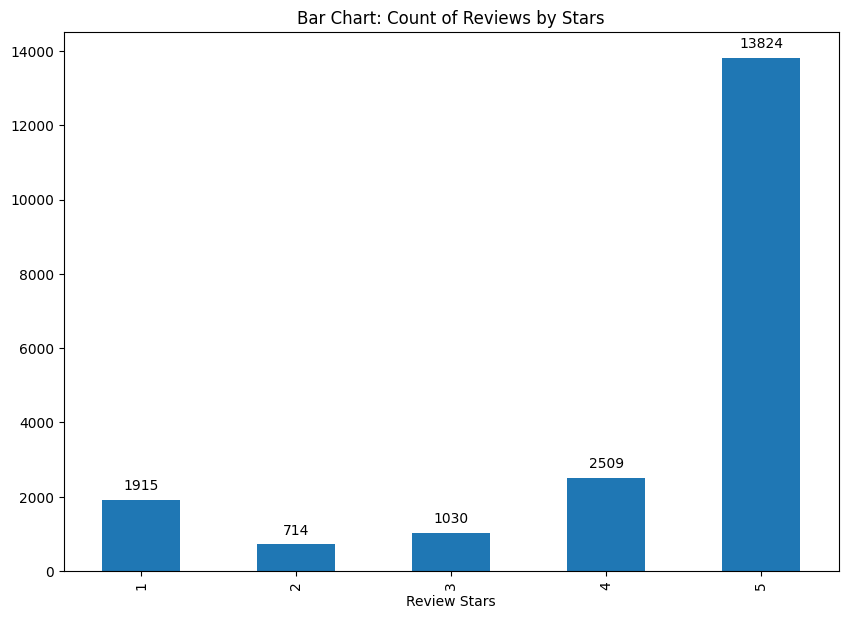

In [16]:
ax = appliances['overall'].value_counts().sort_index()\
    .plot(kind ='bar',
      title ='Bar Chart: Count of Reviews by Stars',
     figsize = (10,7))
ax.set_xlabel('Review Stars')

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'),
                (p.get_x() + p.get_width() /2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points'
               )

plt.show()

The bar plot indicates that **69%** of (13,825 out of 19,993) the consumers has rated **a five-star** on Amazon Appliances evaluation, following by **13%** of **a four-star** rating.

## Research Question

Since there's only 69% of the reviews of Appliances are equal to or greater than a rating of 4, our purpose for this study is to correctly identify the factors that are significant to consumers and hence increase our sales. To achieve this, we will need to build a classification model that can accurately predict the positive consumers reviews to make the further analyzations.

## Exploraing Natural Language Toolkit

NLTK is a filed that focuses on making natural human language usable by computer programs. NLTK, or Natural Language Toolkit, is a Python package to use for NLP. [To read more examples/tutorials in NLTK.](https://realpython.com/nltk-nlp-python/)

### Basic NLTK Technic Playing Around

In [17]:
example = appliances['reviewText'][43215]
print(example)

This is my second Broan range hood.  Both products arrived on time, were perfectly packed, functioned impeccably from the beginning, and have given excellent service.  The first one was white, to fit in with our residence kitchen.  It perfectly suits the room.  My new Broan hood is stainless steel, to match the other appliances of our second house kitchen remodeling.  I was delighted with the moderate price of both these hoods, and my contractors have been amazed at the good deals I got.  I will continue to recommend Broan products for excellent quality, fair pricing, sturdy construction, and ease of installation.


In [18]:
tokens = nltk.word_tokenize(example) #tokenize to split up tezt by word
tokens[:10] #check the first ten words

['This',
 'is',
 'my',
 'second',
 'Broan',
 'range',
 'hood',
 '.',
 'Both',
 'products']

#### Check the Speech for Each Word

POS Tagging (Parts of Speech Tagging) is a process to mark up the words in text format for a particular part of a speech based on its definition and context. It is responsible for text reading in a language and assigning some specific token (Parts of Speech) to each word. It is also called grammatical tagging. [POS tagging examples](https://www.guru99.com/pos-tagging-chunking-nltk.html)

In [19]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('my', 'PRP$'),
 ('second', 'JJ'),
 ('Broan', 'NNP'),
 ('range', 'NN'),
 ('hood', 'NN'),
 ('.', '.'),
 ('Both', 'DT'),
 ('products', 'NNS')]

In [20]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  my/PRP$
  second/JJ
  (PERSON Broan/NNP)
  range/NN
  hood/NN
  ./.
  Both/DT
  products/NNS
  arrived/VBN
  on/IN
  time/NN
  ,/,
  were/VBD
  perfectly/RB
  packed/VBN
  ,/,
  functioned/VBN
  impeccably/RB
  from/IN
  the/DT
  beginning/NN
  ,/,
  and/CC
  have/VB
  given/VBN
  excellent/JJ
  service/NN
  ./.
  The/DT
  first/JJ
  one/NN
  was/VBD
  white/JJ
  ,/,
  to/TO
  fit/VB
  in/IN
  with/IN
  our/PRP$
  residence/NN
  kitchen/NN
  ./.
  It/PRP
  perfectly/RB
  suits/NNS
  the/DT
  room/NN
  ./.
  My/PRP$
  new/JJ
  (GPE Broan/NNP)
  hood/NN
  is/VBZ
  stainless/JJ
  steel/NN
  ,/,
  to/TO
  match/VB
  the/DT
  other/JJ
  appliances/NNS
  of/IN
  our/PRP$
  second/JJ
  house/NN
  kitchen/NN
  remodeling/VBG
  ./.
  I/PRP
  was/VBD
  delighted/VBN
  with/IN
  the/DT
  moderate/JJ
  price/NN
  of/IN
  both/DT
  these/DT
  hoods/NNS
  ,/,
  and/CC
  my/PRP$
  contractors/NNS
  have/VBP
  been/VBN
  amazed/VBN
  at/IN
  the/DT
  good/JJ
  deals/NNS
  I/PRP

### VADER Sentiment

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text. VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:
* negative
* neutral
* positive
* compound (computed by normalizing the scores above \
Reference: [SENTIMENTAL ANALYSIS USING VADER](https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664)

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()

In [22]:
print(example)

This is my second Broan range hood.  Both products arrived on time, were perfectly packed, functioned impeccably from the beginning, and have given excellent service.  The first one was white, to fit in with our residence kitchen.  It perfectly suits the room.  My new Broan hood is stainless steel, to match the other appliances of our second house kitchen remodeling.  I was delighted with the moderate price of both these hoods, and my contractors have been amazed at the good deals I got.  I will continue to recommend Broan products for excellent quality, fair pricing, sturdy construction, and ease of installation.


In [23]:
sia.polarity_scores(example)
#shows a positive rate for example

{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.9872}

In [24]:
# Polarity score on the entire dataset
res = {}
for i, row in tqdm(appliances.iterrows(),total=len(appliances)):
    text = row['reviewText']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 19992/19992 [00:20<00:00, 976.43it/s] 


In [25]:
# Sentiment Score and Metadata
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index':'ID'})
vaders = vaders.merge(appliances, how = 'left')
vaders.head()

,ID,neg,neu,pos,compound,overall,reviewText
0,43215,0.000,0.713,0.287,0.9872,5,This is my second Broan range hood. Both prod...
1,514446,0.063,0.897,0.039,-0.1101,3,We've now owned this dishwasher just under two...
2,154039,0.096,0.563,0.342,0.9152,5,Worked perfectly as a replacement for a faulty...
3,519048,0.060,0.885,0.055,-0.0644,3,This item works great and arrived on time. But...
4,192624,0.057,0.834,0.109,0.9697,5,In the laundry mat I have come across many thi...


#### Plot VADER results


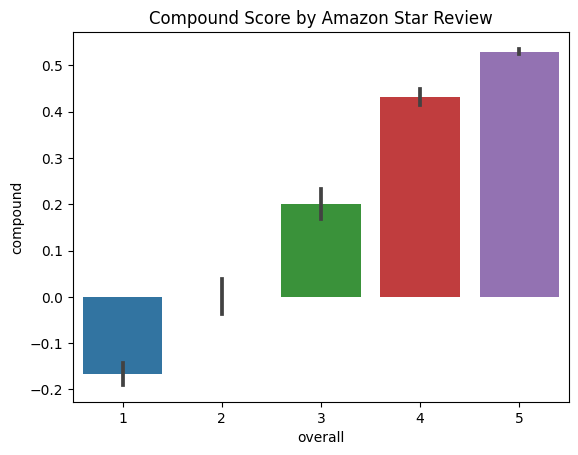

In [26]:
ax = sns.barplot(data = vaders, x = 'overall', y = 'compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

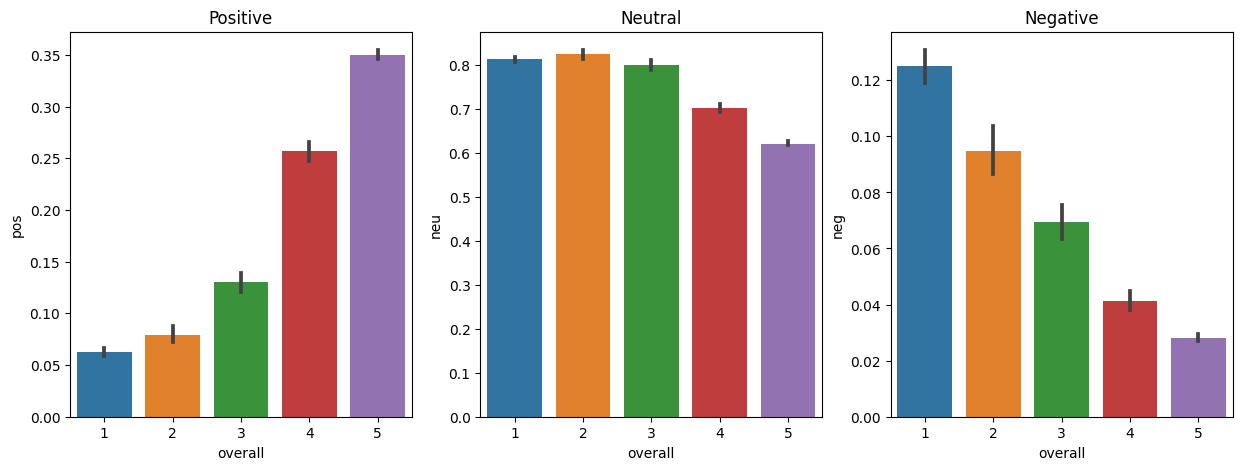

In [27]:
fig, axs= plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders, x='overall', y='pos',ax=axs[0])
sns.barplot(data=vaders, x='overall', y='neu',ax=axs[1])
sns.barplot(data=vaders, x='overall', y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

As expected, the higher the star rate returns to a higher vader score, vice versa. Neural shows a flat pattern.

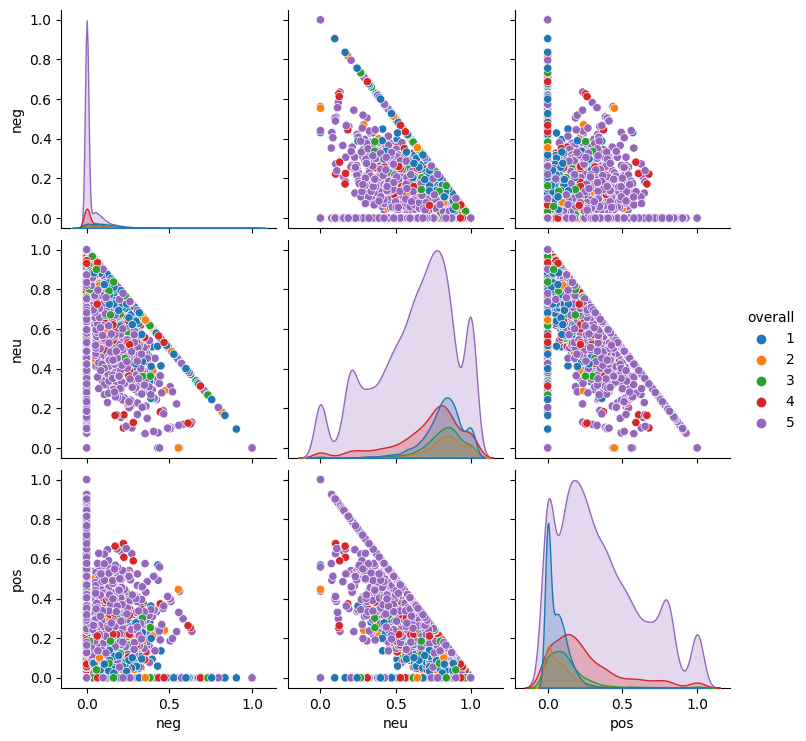

In [28]:
sns.pairplot(data = vaders,
             vars = ['neg','neu','pos'],
             hue = 'overall',
             palette = 'tab10')
plt.show()

The Vader model is not that confident as the pair plot for positive rating shows a right skewed pattern. 

In [29]:
vaders.query('overall == 1') \
      .sort_values('pos', ascending = False)['reviewText'].values[0]
#based on the rating, it's actually a sarcasm

'Great thanks'

In [30]:
vaders.query('overall == 5') \
      .sort_values('neg', ascending = False)['reviewText'].values[0]
#analyzing based on single words are negative for each, however the context actually provides a posirive feedback

'no problem'

It lacks the ability to comprehend the context or sarcasm. 

## Model Building

### Data Preparing

In [31]:
#To predict the Sentiment as positive(numerical value = 1) or negative(numerical value = 0), we need to change them the values to those categories.
#For that the condition will be like if the sentiment value is less than or equal to 3, then it is negative(0) else positive(1). 
#1,2,3->negative(i.e 0)
appliances['binary_rating'] = appliances['overall'].apply(lambda x: 1 if x >= 4 else 0)

#4,5->positive(i.e 1)
#store this binary into a 'binary_rating'

/tmp/ipykernel_67/3527698224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appliances['binary_rating'] = appliances['overall'].apply(lambda x: 1 if x >= 4 else 0)


In [32]:
appliances.head() #checking rating

,ID,overall,reviewText,binary_rating
43215,43215,5,This is my second Broan range hood. Both prod...,1
514446,514446,3,We've now owned this dishwasher just under two...,0
154039,154039,5,Worked perfectly as a replacement for a faulty...,1
519048,519048,3,This item works great and arrived on time. But...,0
192624,192624,5,In the laundry mat I have come across many thi...,1


In [33]:
#Now, once the dataset is ready, we will clean the review column by removing the stopwords.
stp_words = stopwords.words('english')
def clean_review(reviewText):
    cleanreview = " ".join(word for word in reviewText.
					split() if word not in stp_words)
    return cleanreview

appliances['reviewText'] = appliances['reviewText'].apply(clean_review)


/tmp/ipykernel_67/135368377.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appliances['reviewText'] = appliances['reviewText'].apply(clean_review)


In [34]:
appliances.head()
#overall is a binary variable now
#the reviewText has removed the stop words

,ID,overall,reviewText,binary_rating
43215,43215,5,This second Broan range hood. Both products ar...,1
514446,514446,3,We've owned dishwasher two years. The air vent...,0
154039,154039,5,Worked perfectly replacement faulty switch Whi...,1
519048,519048,3,This item works great arrived time. But box op...,0
192624,192624,5,In laundry mat I come across many things added...,1


In [35]:
#Let’s check out that how many counts are there for positive and negative ratings (overall).
appliances['binary_rating'].value_counts()

binary_rating
1    16333
0     3659
Name: count, dtype: int64

### Word Cloud Figures

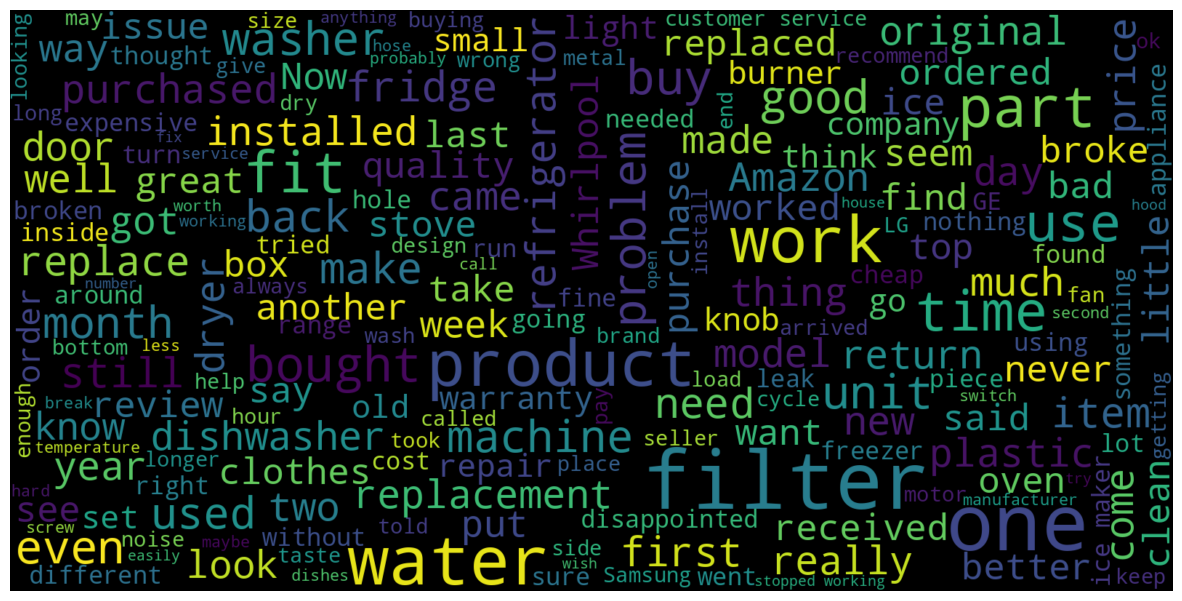

In [36]:
# To have the better picture of the importance of the words let’s create the Wordcloud of all the words with sentiment = 0
consolidated =' '.join(word for word in appliances['reviewText'][appliances['binary_rating'] == 0].astype(str))
wordCloud = WordCloud(width = 1600,height = 800,
                      random_state = 21,max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation = 'bilinear')
plt.axis('off')
plt.show()


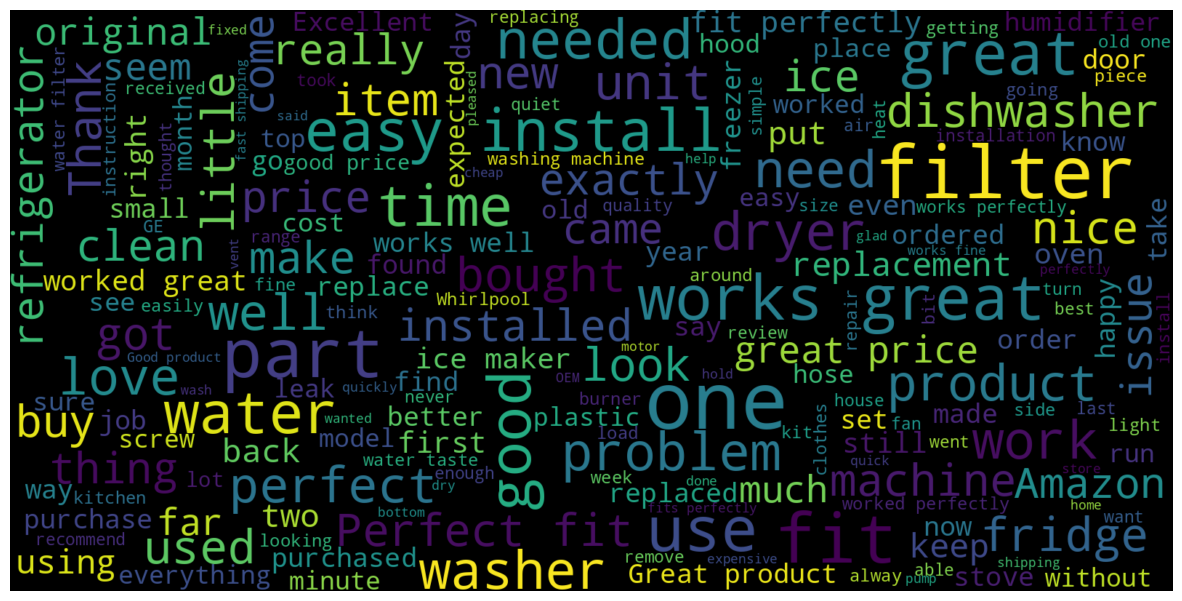

In [37]:
#We do the same for all the words with sentiment = 1
consolidated =' '.join(word for word in appliances['reviewText'][appliances['binary_rating'] == 1].astype(str))
wordCloud = WordCloud(width = 1600,height = 800,
                      random_state = 21,max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation = 'bilinear')
plt.axis('off')
plt.show()


### Split Datasets into Positive and Negative Sets

This step will be applied in later sentiment analysis accuracy testing.

In [38]:
appliances_positive = appliances[appliances['overall'] >= 4] #rating >= 4 --> positive
appliances_negative = appliances[appliances['overall'] < 4] #rating <4 --> negative

In [39]:
print(len(appliances_positive)) #16,334
print(len(appliances_negative)) #3,659
appliances_negative.head()

#y: binary_rating
#x: reviewText

16333
3659


,ID,overall,reviewText,binary_rating
514446,514446,3,We've owned dishwasher two years. The air vent...,0
519048,519048,3,This item works great arrived time. But box op...,0
388609,388609,1,Product filter- still taste chlorine. Lasted w...,0
594337,594337,1,Installed Bosch B26FT Refrigerator. Seemed ins...,0
193431,193431,3,Be sure check really closely see dents hiding ...,0


In [40]:
X_pos = appliances_positive['reviewText']
Y_pos = appliances_positive['binary_rating']

X_neg = appliances_negative['reviewText']
Y_neg = appliances_negative['binary_rating']

In [41]:
#combine X and Y before splitting training and test

In [42]:
import numpy as np

In [43]:
X = np.concatenate((X_pos, X_neg), axis=0)
X = pd.DataFrame(X) #convert into a dataframe

In [44]:
Y = np.concatenate((Y_pos, Y_neg), axis=0)
Y = pd.DataFrame(Y)

### Split Datasets into Training and Test Sets

* Train test split: 20% will be in the test set, and 80% in the training set.

In [45]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [46]:
print(len(X_train))
print(len(X_test))

15993
3999


### Logistic Regression

In [47]:
import re
import nltk
from os import getcwd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import string

In [48]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [49]:
reviews = appliances['reviewText'].tolist()
tweet=reviews[0]
tweet = re.sub(r'\$\w*', '', tweet)
tweet

'This second Broan range hood. Both products arrived time, perfectly packed, functioned impeccably beginning, given excellent service. The first one white, fit residence kitchen. It perfectly suits room. My new Broan hood stainless steel, match appliances second house kitchen remodeling. I delighted moderate price hoods, contractors amazed good deals I got. I continue recommend Broan products excellent quality, fair pricing, sturdy construction, ease installation.'

In [50]:
def build_freqs(reviews, ys):
    """Build frequencies.
    Input:
        reviews: a list of reviews
        ys: an m x 1 array with the sentiment label of each review
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, review in zip(yslist, reviews):
        for word in process_tweet(review):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs


In [51]:
# create frequency dictionary
freqs = build_freqs(X_train[0].tolist(), Y_train)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 15130


In [52]:
# UNQ_C1 GRADED FUNCTION: sigmoid
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    
    ### START CODE HERE ###
    # calculate the sigmoid of z
    h = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return h

In [53]:
# Testing your function 
if (sigmoid(0) == 0.5):
    print('SUCCESS!')
else:
    print('Oops!')

if (sigmoid(4.92) == 0.9927537604041685):
    print('CORRECT!')
else:
    print('Oops again!')

SUCCESS!
CORRECT!


In [54]:
# UNQ_C2 GRADED FUNCTION: gradientDescent
def gradientDescent(X, Y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    ### START CODE HERE ###
    # get 'm', the number of rows in matrix x
    m = X.shape[0]   
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(X,theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = np.dot((-1/m),(np.dot(np.transpose(Y),np.log(h))+np.dot(np.transpose(1-Y),np.log(1-h))))

        # update the weights theta
        theta = theta - (alpha/m) * np.dot(np.transpose(X),(h-Y))
        
    ### END CODE HERE ###
    J = float(J)
    return J, theta

In [55]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3,1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


In [56]:
# UNQ_C3 GRADED FUNCTION: extract_features
def extract_features(review, freqs):
    '''
    Input: 
        reviews: a list of words for one review
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(review)
    
    # 3 elements in the form of a 1 x 3 vector
    X = np.zeros((1, 3)) 
    
    #bias term is set to 1
    X[0,0] = 1 
    
    ### START CODE HERE ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        X[0,1] += freqs.get((word,1.0),0)
        
        # increment the word count for the negative label 0
        X[0,2] += freqs.get((word,0.0),0)
        
    ### END CODE HERE ###
    assert(X.shape == (1, 3))
    return X

In [57]:
X_train.values[0].tolist()

['Part arrived promised, said would, pleased easy fit, saved pounds.']

In [58]:
# Check your function
# test 1
# test on training data
tmp1 = extract_features(X_train.values[0].tolist()[0], freqs)
print(tmp1)

[[1.000e+00 8.394e+03 2.263e+03]]


In [59]:
# test 2:
# check for when the words are not in the freqs dictionary
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


In [60]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(X_train), 3))
for i in range(len(X_train)):
    X[i,:] = extract_features(X_train.iloc[i,0], freqs)

# training labels corresponding to X
Y = Y_train

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.53262233.
The resulting vector of weights is [2.4e-07, 0.00017223, -0.00031233]


In [61]:
# UNQ_C4 GRADED FUNCTION: predict_tweet
def predict_review(review, freqs, theta):
    '''
    Input: 
        reviews: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE ###
    
    # extract the features of the tweet and store it into x
    X = extract_features(review,freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(X,theta))
    
    ### END CODE HERE ###
    
    return y_pred

In [62]:
# Run this cell to test your function
for review in ['I am pissed', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (review, predict_review(review, freqs, theta)))

I am pissed -> 0.499852
I am bad -> 0.494790
this movie should have been great. -> 0.632527
great -> 0.632399
great great -> 0.747448
great great great -> 0.835837
great great great great -> 0.897532


In [63]:
X_test

,0
8715,"Still working, four weeks later. Seems described."
6463,Easy install works great. I saved lot money bu...
1815,Works great
9119,Great price - work fine
12598,Great replacement great cost. Fits like glove ...
...,...
196,Humidifier Water Treatment keeps water pretty ...
518,Thank goodness these!! They fantastic. High qu...
4653,"Fits dryer really well, easy clean, sturdy fra..."
5763,Fast delivery good product


In [64]:
# UNQ_C5 GRADED FUNCTION: test_logistic_regression

def test_logistic_regression(X_test, Y_test, freqs, theta, threshold ,predict_review=predict_review):
    """
    Input: 
        X_test: a pandas DataFrame with a column of tweets
        Y_test: a pandas DataFrame with a column of labels for the tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
        predict_review: function to predict the sentiment of a tweet
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
        cm: confusion matrix
        precision: positive predictive value
        recall: true positive rate
    """
    
    # the list for storing predictions
    y_hat = []
    
    for review in X_test.values:
        # get the label prediction for the tweet
        y_pred = predict_review(review[0], freqs, theta)
        
        if y_pred > threshold:
            # append 1.0 to the list
            y_hat.append(1.0)
        else:
            # append 0 to the list
            y_hat.append(0.0)

    # convert both y_hat and Y_test to one-dimensional arrays
    y_hat = np.array(y_hat)
    y_true = Y_test.values.reshape(-1,)

    # calculate accuracy
    accuracy = np.mean(y_hat == y_true)

     # calculate confusion matrix
    cm = confusion_matrix(y_true, y_hat)
    
    # calculate precision and recall
    tp = cm[1, 1]
    fp = cm[0, 1]
    tn = cm[0, 0]
    fn = cm[1, 0]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    return accuracy, cm, precision, recall

In [65]:
# Test the function with a different threshold value
accuracy, cm, precision, recall = test_logistic_regression(X_test, Y_test, freqs, theta, threshold=0.5)
print(f"Logistic regression model's accuracy = {accuracy:.4f}")
print(f"Logistic Confusion matrix:\n{cm}")
print(f"Precision = {precision:.4f}")
print(f"Recall = {recall:.4f}")

Logistic regression model's accuracy = 0.8307
Logistic Confusion matrix:
[[  73  651]
 [  26 3249]]
Precision = 0.8331
Recall = 0.9921


In the Amazon Appliances review, the dataset contains **69%** positive evaluation from consumers. The purpose of this project is to figure out the factors consumers care the most in Appliances, and hence increase consumers' satisfaction and the sales. In this way, **precision (TP/(TP+FP))** is a more significant factor to consider since we are more interested in increasing the prediction of classifying the right class for postive reviews (increase precision). Therefore, we set our threshold to 0.5 to minimize the Type I error, meaning that we want to reduce the misclassifaction when a negative feedback is mistakenly classified as a positive feedback, and meanwhile we still have a decent model testing accuracy (83%) at the threshold of 0.5.

In [66]:
# Some error analysis done for you
print('Label Predicted Tweet')
for x,y in zip(X_test.values,Y_test):
    y_hat = predict_review(x[0], freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_tweet(x[0]))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x[0])).encode('ascii', 'ignore')))

Label Predicted Tweet
THE TWEET IS: ['Still working, four weeks later. Seems described.']
THE PROCESSED TWEET IS: ['still', 'work', 'four', 'week', 'later', 'seem', 'describ']
0	0.62729839	b'still work four week later seem describ'


In [67]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat =predict_review(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.49576343]]
Negative sentiment


### Naive Bayes

In [ ]:
# UNQ_C1 GRADED FUNCTION: count_tweets

def count_tweets(result, tweets, ys):
    '''
    Input:
        result: a dictionary that will be used to map each pair to its frequency
        tweets: a list of tweets
        ys: a list corresponding to the sentiment of each tweet (either 0 or 1)
    Output:
        result: a dictionary mapping each pair to its frequency
    '''
    ### START CODE HERE ###
    yslist = np.squeeze(ys).tolist()
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            # define the key, which is the word and label tuple
            pair = (word,y)
            # if the key exists in the dictionary, increment the count
            if pair in result:
                result[pair] += 1
            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[pair] = 1
    ### END CODE HERE ###

    return result

In [ ]:
# Testing your function

result = {}
tweets = ['i am happy', 'i am tricked', 'i am sad', 'i am tired', 'i am tired']
ys = [1, 0, 0, 0, 0]
count_tweets(result, tweets, ys)

In [ ]:
# Build the freqs dictionary for later uses
freqs = count_tweets({},X_train[0].tolist(), Y_train)
freqs 

In [ ]:
# UNQ_C2 GRADED FUNCTION: train_naive_bayes

def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of tweets
        train_y: a list of labels correponding to the tweets (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
    '''
    loglikelihood = {}
    logprior = 0

    ### START CODE HERE ###

    # calculate V, the number of unique words in the vocabulary
    def Extract(lst):
        return [item[0] for item in lst]
    vocab = Extract(freqs)
    V = len(freqs)    

    # calculate N_pos, N_neg, V_pos, V_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:

            # Increment the number of positive words by the count for this (word, label) pair
            N_pos += 1

        # else, the label is negative
        else:

            # increment the number of negative words by the count for this (word,label) pair
            N_neg += 1
    
    # Calculate D, the number of documents
    D = len(train_y)

    # Calculate D_pos, the number of positive documents
    D_pos = np.count_nonzero(train_y)

    # Calculate D_neg, the number of negative documents
    D_neg = D-D_pos

    # Calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)

    N_pos = len(dict(filter(lambda item: 1.0 in item[0], freqs.items())))
    N_neg = len(dict(filter(lambda item: 0.0 in item[0], freqs.items())))
    
    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word,1.0),0)
        freq_neg = freqs.get((word,0.0),0)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)
        
        # calculate the log likelihood of the word
        loglikelihood[word]= np.log(p_w_pos) - np.log(p_w_neg)

    ### END CODE HERE ###

    return logprior, loglikelihood

In [ ]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
logprior, loglikelihood = train_naive_bayes(freqs, X_train[0].tolist(), Y_train[0].tolist())
print(logprior)
print(len(loglikelihood))

In [ ]:
# UNQ_C4 GRADED FUNCTION: naive_bayes_predict

def naive_bayes_predict(tweet, logprior, loglikelihood,threshold=0):
    '''
    Input:
        tweet: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Output:
        p: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)

    '''
    ### START CODE HERE ###
    # process the tweet to get a list of words
    word_l = process_tweet(tweet)

    # initialize probability to zero
    p = 0

    # add the logprior
    p += logprior

    for word in word_l:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            p += loglikelihood.get(word,0)

    ### END CODE HERE ###

    return p

In [ ]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# Experiment with your own tweet.
my_tweet = 'She smiled.'
p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print('The expected output is', p)

In [ ]:
# UNQ_C6 GRADED FUNCTION: test_naive_bayes

def test_naive_bayes(test_x, test_y, logprior, loglikelihood, threshold, naive_bayes_predict=naive_bayes_predict):
    """
    Input:
        test_x: A list of tweets
        test_y: the corresponding labels for the list of tweets
        logprior: the logprior
        loglikelihood: a dictionary with the loglikelihoods for each word
    Output:
        accuracy: (# of tweets classified correctly)/(total # of tweets)
        cm: confusion matrix
        precision: positive predictive value
        recall: true positive rate
    """
    accuracy = 0  # return this properly

    ### START CODE HERE ###
    y_hats = []
    for tweet in test_x:
        # if the prediction is > threshold
        if naive_bayes_predict(tweet, logprior, loglikelihood, threshold) > threshold:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0

        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)

    
    y_hat = np.array(y_hats)
    y_true = np.array(test_y)

    accuracy = np.mean(y_hat == y_true)
    
    # calculate confusion matrix
    cm = confusion_matrix(y_true, y_hat)
    
    # calculate precision and recall
    tp = cm[1, 1]
    fp = cm[0, 1]
    tn = cm[0, 0]
    fn = cm[1, 0]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    return accuracy, cm, precision, recall

In [ ]:
threshold = 3 #change this value to test different thresholds
accuracy, cm, precision, recall = test_naive_bayes(X_test[0].tolist(), Y_test[0].tolist(), logprior, loglikelihood, threshold)
print(f"Naive Bayes' accuracy = {accuracy:.4f}")
print(f"Naive Bayes' Confusion matrix:\n{cm}")
print(f"Precision = {precision:.4f}") 
print(f"Recall = {recall:.4f}")

The purpose of this project is to figure out the factors consumers care the most in Appliances, and hence increase consumers' satisfaction and the sales. In this way, **precision (TP/(TP+FP))** is a more significant factor to consider since we are more interested in increasing the prediction of classifying the right class for postive reviews (increase precision). Therefore, we set our threshold to 3 to minimize the Type I error, meaning that we want to reduce the misclassifaction when a negative feedback is mistakenly classified as a positive feedback, and meanwhile we still have a decent model testing accuracy (82%) at the threshold of 0.5.

In [ ]:
# UNQ_C7 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:    
    p = naive_bayes_predict(tweet, logprior, loglikelihood)
    print(f'{tweet} -> {p:.2f}')

In [ ]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'you are good and excellent :('
naive_bayes_predict(my_tweet, logprior, loglikelihood)

In [ ]:
def lookup(freqs, word, label):
    '''
    Input:
        freqs: a dictionary with the frequency of each pair (or tuple)
        word: the word to look up
        label: the label corresponding to the word
    Output:
        n: the number of times the word with its corresponding label appears.
    '''
    n = 0  # freqs.get((word, label), 0)

    pair = (word, label)
    if (pair in freqs):
        n = freqs[pair]

    return n

In [ ]:

def get_ratio(freqs, word):
    '''
    Input:
        freqs: dictionary containing the words

    Output: a dictionary with keys 'positive', 'negative', and 'ratio'.
        Example: {'positive': 10, 'negative': 20, 'ratio': 0.5}
    '''
    pos_neg_ratio = {'positive': 0, 'negative': 0, 'ratio': 0.0}
    ### START CODE HERE ###
    # use lookup() to find positive counts for the word (denoted by the integer 1)
    pos_neg_ratio['positive'] = lookup(freqs,word,1)
    
    # use lookup() to find negative counts for the word (denoted by integer 0)
    pos_neg_ratio['negative'] = lookup(freqs,word,0)
    
    # calculate the ratio of positive to negative counts for the word
    pos_neg_ratio['ratio'] = (pos_neg_ratio['positive']+1) / (pos_neg_ratio['negative']+1)
    ### END CODE HERE ###
    return pos_neg_ratio


In [ ]:
get_ratio(freqs, 'happi')

In [ ]:
def get_words_by_threshold(freqs, label, threshold, get_ratio=get_ratio):
    '''
    Input:
        freqs: dictionary of words
        label: 1 for positive, 0 for negative
        threshold: ratio that will be used as the cutoff for including a word in the returned dictionary
    Output:
        word_list: dictionary containing the word and information on its positive count, negative count, and ratio of positive to negative counts.
        example of a key value pair:
        {'happi':
            {'positive': 10, 'negative': 20, 'ratio': 0.5}
        }
    '''
    word_list = {}

    ### START CODE HERE ###
    for key in freqs.keys():
        word, label = key[0],key[1]

        # get the positive/negative ratio for a word
        pos_neg_ratio = get_ratio(freqs,label)

        # if the label is 1 and the ratio is greater than or equal to the threshold...
        if label == 1 and pos_neg_ratio['ratio'] >= threshold:
        
            # Add the pos_neg_ratio to the dictionary
            word_list[word] = pos_neg_ratio

        # If the label is 0 and the pos_neg_ratio is less than or equal to the threshold...
        elif label == 0 and pos_neg_ratio['ratio'] <= threshold:
        
            # Add the pos_neg_ratio to the dictionary
            word_list[word] = pos_neg_ratio

        # otherwise, do not include this word in the list (do nothing)

    ### END CODE HERE ###
    return word_list

In [ ]:
# Test your function: find negative words at or below a threshold
get_words_by_threshold(freqs, label=0, threshold=0.05)

In [ ]:
# Test your function; find positive words at or above a threshold
get_words_by_threshold(freqs, label=1, threshold=10)

In [ ]:
# Some error analysis done for you
print('Truth Predicted Tweet')
for x, y in zip(X_test[0].tolist(), Y_test[0].tolist()):
    y_hat = naive_bayes_predict(x, logprior, loglikelihood)
    if y != (np.sign(y_hat) > 0):
        print('%d\t%0.2f\t%s' % (y, np.sign(y_hat) > 0, ' '.join(
            process_tweet(x)).encode('ascii', 'ignore')))

In [ ]:
# Test with your own tweet - feel free to modify `my_tweet`
my_tweet = 'I am happy because I am learning :)'

p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print(p)

## Topic Modeling

In [94]:
#import pandas as pd
#import re
#import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
plt.style.use("fivethirtyeight")
pd.set_option('display.max_colwidth', 80)
import matplotlib.patheffects as path_effects
#import nltk
#import numpy as np
#import seaborn as sns
import gensim
#nltk.download('stopwords')
nltk.download('wordnet')
#from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from collections import Counter

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [95]:
appliances

,ID,overall,reviewText,binary_rating
43215,43215,5,"This second Broan range hood. Both products arrived time, perfectly packed, ...",1
514446,514446,3,We've owned dishwasher two years. The air vent design awful - never dried di...,0
154039,154039,5,Worked perfectly replacement faulty switch Whirlpool stove. Really easy repl...,1
519048,519048,3,This item works great arrived time. But box open time. Some parts assembled ...,0
192624,192624,5,"In laundry mat I come across many things added bad experience. Corn kernals,...",1
...,...,...,...,...
340613,340613,5,Don't waste money oem,1
75709,75709,1,"I ordered replace yellow one I broke. Upon arrival, I started using said fac...",0
389592,389592,5,Good fit,1
98222,98222,1,WRONG ITEM.KMT,0


In [96]:
appliances = APPLIANCES[['overall','reviewText']]

In [97]:
reviews = appliances.dropna()

In [98]:
reviews = reviews.drop_duplicates(subset='reviewText')

### Data Cleaning and Preprocessing

In [99]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am","i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not","what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [100]:
def text_preprocessing(text):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Expand contractions
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
        
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\'', ' ', text) 

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]

    return text
def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

In [101]:
reviews['Review_Clean_List'] = list(map(text_preprocessing, reviews.reviewText))

In [102]:
reviews['Review_Clean'] = list(map(to_string, reviews['Review_Clean_List']))

In [103]:
pd.set_option('display.max_colwidth', 15000)
reviews.sample()

,overall,reviewText,Review_Clean_List,Review_Clean
334994,5,Fits into small spaces and keeps contents cold. Solid construction and well insulated.,"[fit, into, small, space, and, keep, content, cold, solid, construction, and, well, insulate]",fit into small space and keep content cold solid construction and well insulate


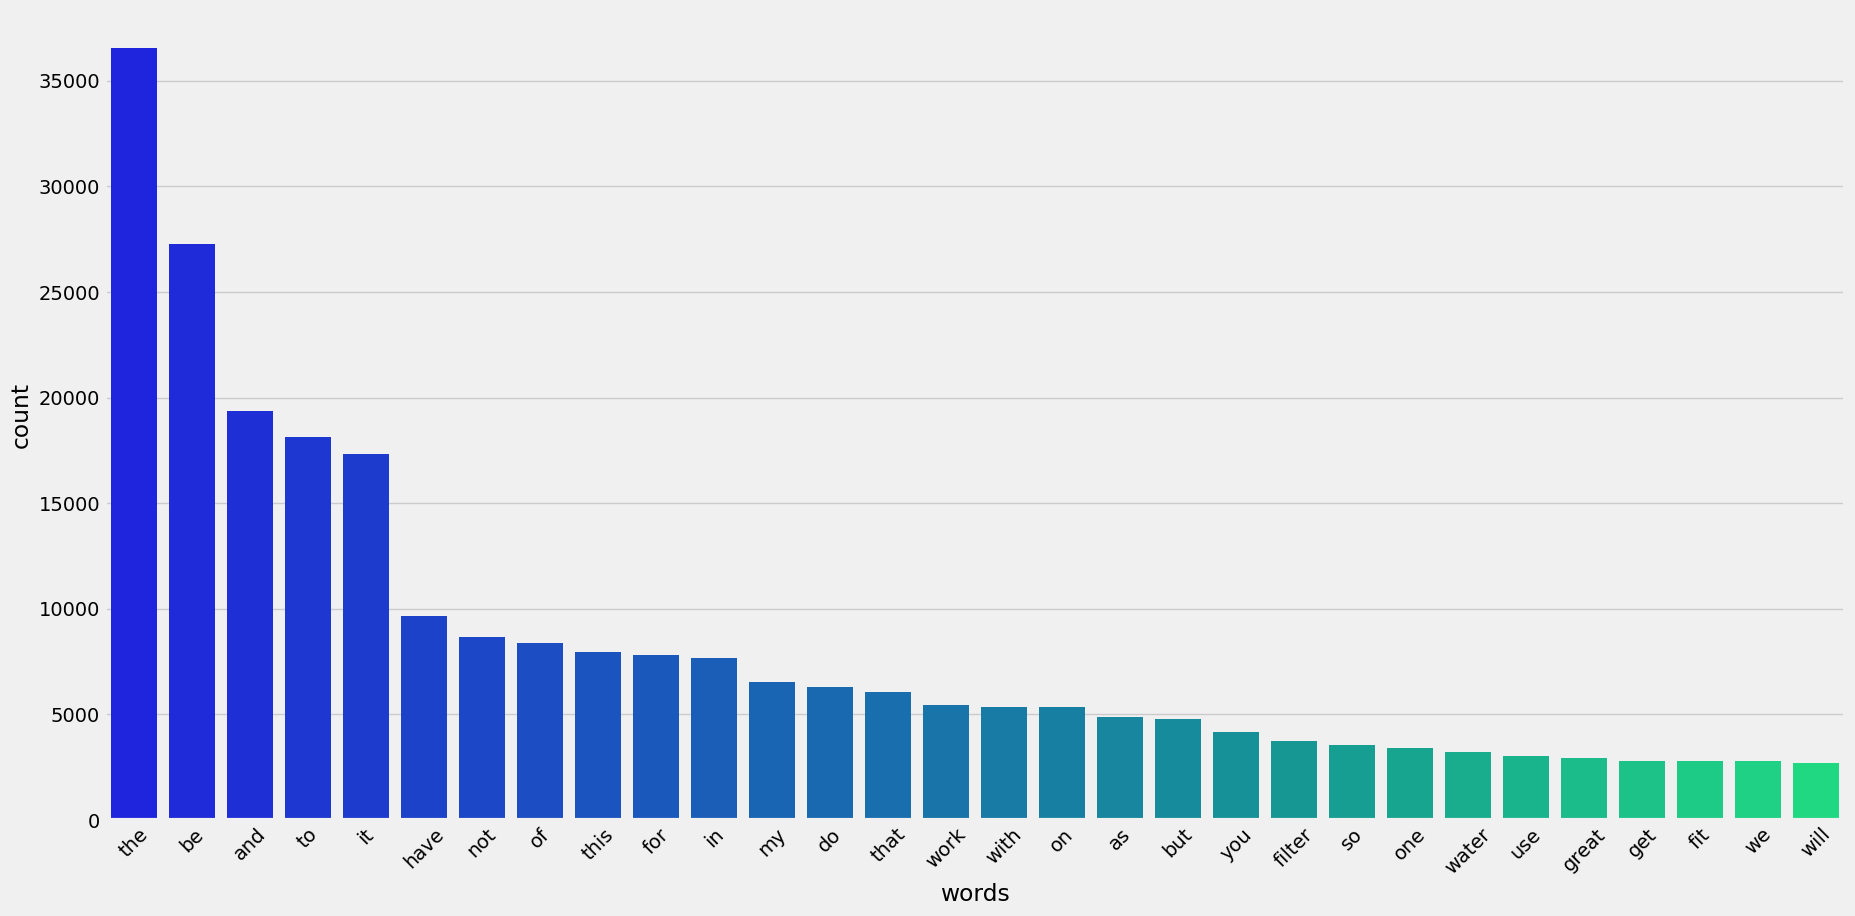

In [104]:
# Join  text together
review_words = ','.join(list(reviews['Review_Clean'].values))

# Count each word
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

In [105]:
stopwords_list = stopwords.words('english')
stopwords_list.extend(['filter', 'water'])

In [106]:
reviews['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in reviews['Review_Clean_List']]

In [107]:
reviews['Review_Clean'] = list(map(to_string, reviews['Review_Clean_List']))

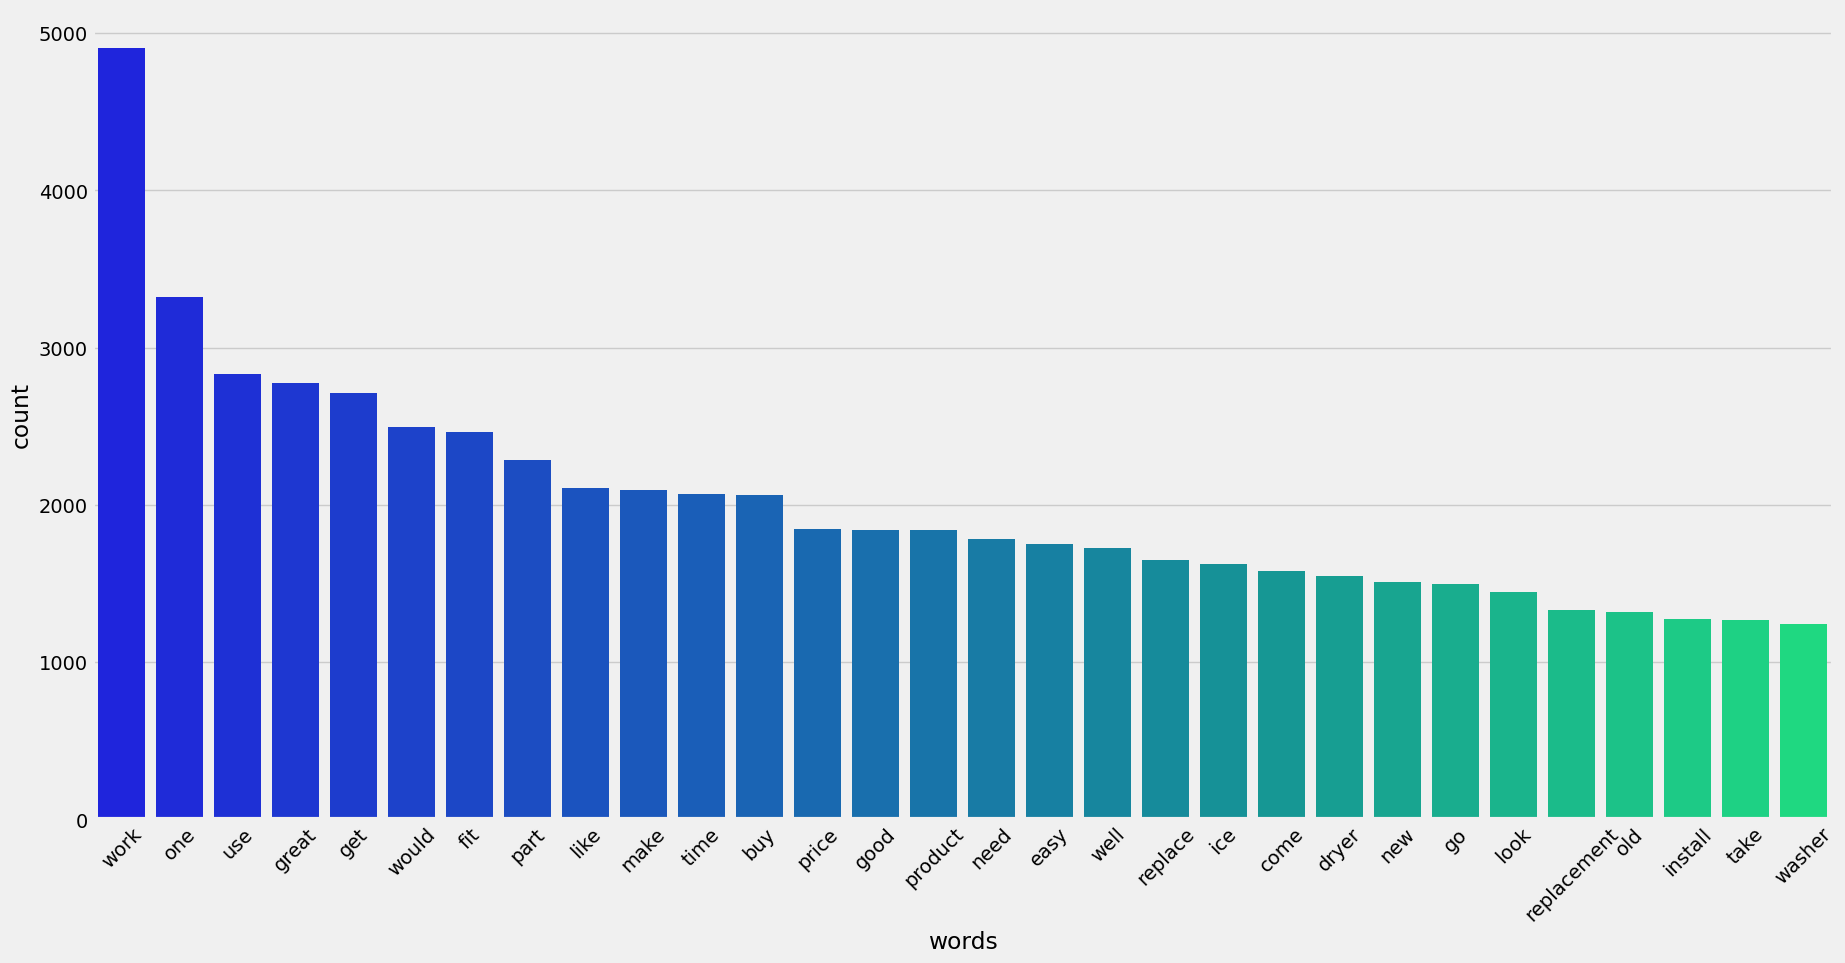

In [108]:
from collections import Counter

# Join  text together
review_words = ','.join(list(reviews['Review_Clean'].values))

# Count each word
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

### Bag-of-Words

In [109]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(reviews['Review_Clean_List'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in reviews['Review_Clean_List']]

### Determining the Number of Topics

<AxesSubplot: xlabel='number_of_topics', ylabel='coherence_score'>

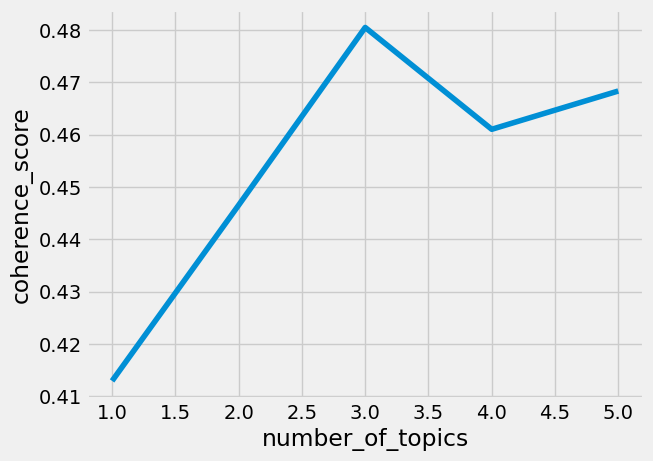

In [110]:
from gensim.models import CoherenceModel
# Compute Coherence Score
number_of_topics = []
coherence_score = []
for i in range(1,6):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews['Review_Clean_List'], dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    number_of_topics.append(i)
    coherence_score.append(coherence_lda)
# Create a dataframe of coherence score by number of topics 
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [111]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.015*"buy" + 0.014*"use" + 0.012*"would" + 0.011*"get" + 0.011*"wash" + 0.011*"good" + 0.010*"fit" + 0.010*"one" + 0.010*"machine" + 0.009*"washer"


Topic: 1 Word: 0.064*"work" + 0.039*"great" + 0.036*"fit" + 0.024*"easy" + 0.024*"part" + 0.019*"install" + 0.018*"perfect" + 0.017*"price" + 0.016*"need" + 0.016*"perfectly"


Topic: 2 Word: 0.024*"ice" + 0.015*"make" + 0.010*"get" + 0.009*"use" + 0.008*"one" + 0.008*"unit" + 0.007*"back" + 0.006*"maker" + 0.006*"put" + 0.006*"would"


Topic: 3 Word: 0.015*"dryer" + 0.011*"use" + 0.011*"would" + 0.010*"work" + 0.010*"get" + 0.009*"time" + 0.008*"one" + 0.008*"problem" + 0.007*"washer" + 0.007*"months"


Topic: 4 Word: 0.021*"one" + 0.015*"product" + 0.015*"work" + 0.013*"look" + 0.013*"buy" + 0.012*"great" + 0.011*"order" + 0.010*"price" + 0.009*"taste" + 0.008*"good"




In [112]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [113]:
graph = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
graph

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.112634  0.095227       1        1  21.693628
3     -0.077167 -0.000552       2        1  19.961358
4      0.025655 -0.032772       3        1  19.910087
1      0.192893  0.043965       4        1  19.900298
0     -0.028747 -0.105867       5        1  18.534629, topic_info=      Term         Freq        Total Category  logprob  loglift
101   work  6626.000000  6626.000000  Default  30.0000  30.0000
105  great  3890.000000  3890.000000  Default  29.0000  29.0000
14     fit  3413.000000  3413.000000  Default  28.0000  28.0000
294    ice  1814.000000  1814.000000  Default  27.0000  27.0000
87    easy  2018.000000  2018.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
26     new   304.549410  1766.044098   Topic5  -5.3442  -0.0721
356    top   254.753231   720.324993   Topic5  -5.5227   0.6461
60      go   287.635420  1638.038319   Topic5  -5.4013  -0.0540
238   well   289.591977  1849.067740   Topic5  -5.3945  -0.1684
66    make   279.958078  2217.252375   Topic5  -5.4284  -0.3839

[430 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3704      1  0.973627       ">
3704      2  0.016227       ">
3704      3  0.016227       ">
1693      5  0.944727       $$
46        1  0.156132      ...
...     ...       ...      ...
322       1  0.030032  youtube
322       2  0.048051  youtube
322       3  0.006006  youtube
322       4  0.900955  youtube
322       5  0.018019  youtube

[1086 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 2, 1])

## Comparing Logistic and NB with Scikit-learn Packages

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
#Converting text into Vectors
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(appliances['reviewText']).toarray()

In [84]:
x_train ,x_test,y_train,y_test=train_test_split(X,appliances['overall'],test_size=0.20 ,random_state=42)

In [85]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

0.7449362340585146


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))

0.7449362340585146


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [93]:
model2=MultinomialNB()

#Model fitting
model2.fit(x_train,y_train)

#testing the model
pred=model2.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))

0.7139284821205302
